<a href="https://colab.research.google.com/github/MHSSCE/IPMV/blob/main/IPMV_PRAC_02_5221050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files
from skimage import color, io

In [4]:
uploaded = files.upload()

Saving download.png to download.png


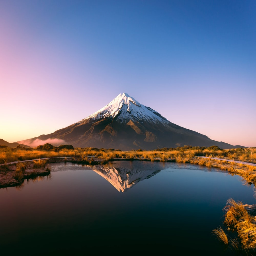

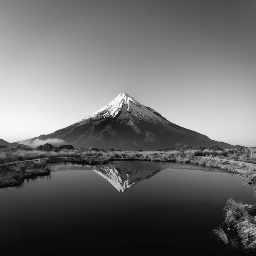

(<matplotlib.axes._subplots.AxesSubplot at 0x7fada05ba610>,
 (-0.5, 255.5, 255.5, -0.5),
 Text(0.5, 1.0, 'GrayScale Image'))

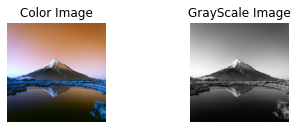

In [10]:
im = cv2.imread("/content/download.png")
im2 = cv2.resize(im, (256,256))
im3 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
cv2_imshow(im2)
cv2_imshow(im3)
plt.subplot(221), plt.imshow(im2), plt.axis("off"), plt.title("Color Image")
plt.subplot(222), plt.imshow(im3, cmap=plt.cm.gray), plt.axis("off"), plt.title("GrayScale Image")

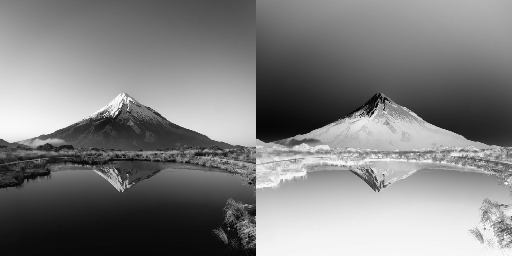

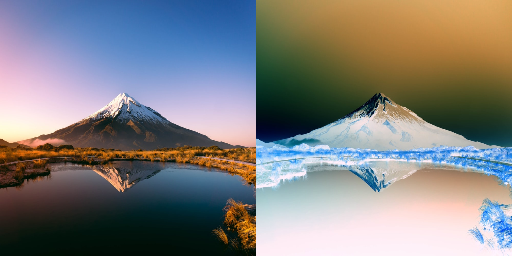

In [11]:
# POINT PROCESSING
# Negation of Given Image

im11 = 255-im3
im12 = 255-im2
a1 = np.concatenate((im3,im11), axis=1)
a2 = np.concatenate((im2,im12), axis=1)
cv2_imshow(a1)
cv2_imshow(a2)

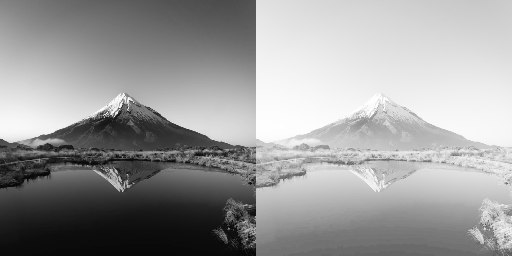

In [13]:
# Log Transformatation
c = 255/np.log(1+np.max(im3))
log_im = c*np.log(im3+1)
ax2 = np.concatenate((im3, log_im), axis = 1)
cv2_imshow(ax2)

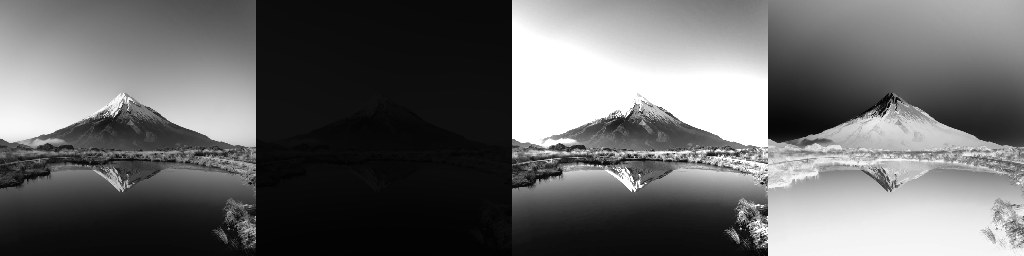

In [17]:
# Power Law of Transformation on Grayscale Image
g1 = 0.51 # gamma value 1
g2 = 1.1 # gamma value 2
g3 = 1.5 # gamma value 3
c1 = 1
im111 = c1*np.power(im3, g1) # Power Transformation using gamma = 0.5
im112 = c1*np.power(im3, g2) # Power Transformation using gamma = 1.1
im113 = c1*np.power(im3, g3) # Power Transformation using gamma = 1.5
ax3 = np.concatenate((im3,im111,im112,im11), axis=1)
cv2_imshow(ax3)

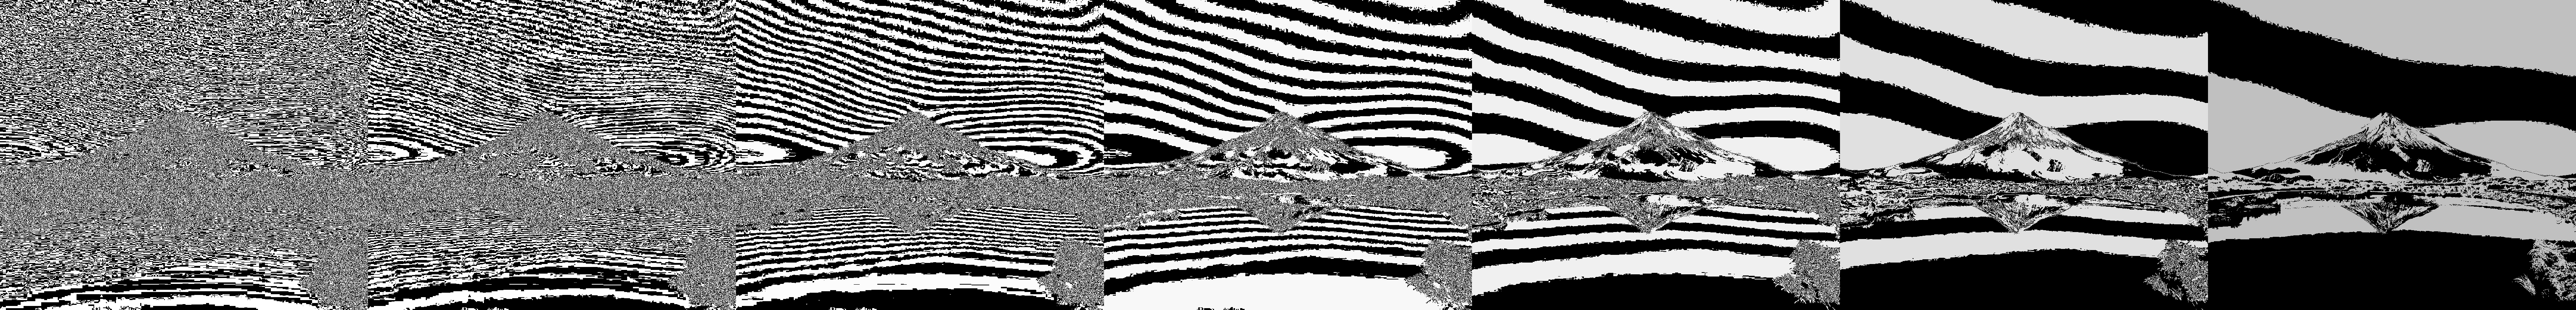

In [18]:
# Bit plane sclicing on given image
img = cv2.imread("/content/download.png",0) 
out = [] 
row= img.shape[0] 
col= img.shape[1] 
for k in range(0,7): # create an image for each k bit plane 
    plane = np.full((row, col), 2 ** k, np.uint8) 
    # execute bitwise and operation 
    res = cv2.bitwise_and(plane, img) 
    # multiply ones (bit plane sliced) with 255 just for better visulization 
    x = res*255 
    # append to the output list 
    out.append(x) 
cv2_imshow(np.hstack(out))


Text(0.5, 1.0, 'Constratc Stretch Image')

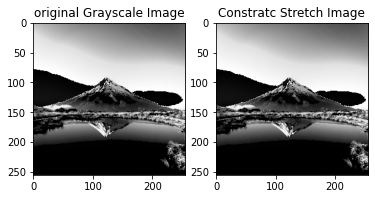

In [32]:
gray_img = im3 
[rows,cols] = gray_img.shape; 
Contr_Strech=gray_img; 
r1=50 
r2=150 
alpha=0.5 
beta=2 
Gama = 0.5 
s1=alpha*r1; 
s2=beta*(r2-r1)+51; 

for r in range(0, rows-1): 
    for c in range(0, cols-1): 
        if (gray_img[r,c]<r1): 
            Contr_Strech[r,c] = alpha*gray_img[r,c];
            s1=alpha*r1
        else: 
            if (gray_img[r,c]<r2): 
                Contr_Strech[r,c]=beta*(gray_img[r,c]-r1)+s1;
                s2=beta*(r2-r1)+s1; 
            else: Contr_Strech[r,c]=Gama*(gray_img[r,c]-r2)+s2;


fig=plt.figure() 
ax1=fig.add_subplot(1,2,1) 
ax1.imshow(gray_img,cmap=plt.cm.gray)
ax1.set_title('original Grayscale Image') 

ax2=fig.add_subplot(1,2,2) 
ax2.imshow(Contr_Strech,cmap=plt.cm.gray) 
ax2.set_title('Constratc Stretch Image') 
